In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
summary_file = '/cubric/collab/108_QA/Images/CUBRIC-3TE/QA3TE/qa3te_2017_2023.dat'

In [3]:
qa = pd.read_csv(summary_file)

In [4]:
qa.describe()

,sfnr_vol,mean_vol,sd_vol,sfnr_voi,mean_voi,sd_voi,drift
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,1068.500256,1460.600673,1.975481,1243.818558,1366.228590,1.107724,0.050192
std,66.735682,74.295946,0.331836,78.204474,88.739815,0.041043,0.030367
min,694.460000,735.660000,1.100000,541.400000,533.050000,0.910000,0.000000
25%,1028.515000,1453.210000,1.770000,1222.220000,1361.730000,1.080000,0.030000
50%,1071.580000,1468.950000,1.955000,1251.880000,1374.285000,1.110000,0.040000
75%,1115.300000,1481.330000,2.160000,1280.920000,1389.915000,1.130000,0.070000
max,1303.970000,1561.990000,3.560000,1378.570000,1467.740000,1.300000,0.160000


In [5]:
qa.columns

Index(['File', 'sfnr_vol', 'mean_vol', 'sd_vol', 'sfnr_voi', 'mean_voi',
       'sd_voi', 'drift'],
      dtype='object')

In [6]:
date_str = qa['File'].str.split('-', expand=True)[0]

In [7]:
date_pd = date_str.str.split('_', expand=True)

In [8]:
date_pd = date_pd.rename(columns={0:'year_short',1:'month',2:'day'})

In [9]:
date_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_short  312 non-null    object
 1   month       312 non-null    object
 2   day         312 non-null    object
dtypes: object(3)
memory usage: 7.4+ KB


In [10]:
date_pd = date_pd.astype('int16')

In [11]:
date_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year_short  312 non-null    int16
 1   month       312 non-null    int16
 2   day         312 non-null    int16
dtypes: int16(3)
memory usage: 2.0 KB


In [15]:
date_pd['year'] = date_pd['year_short'].apply(lambda x: x+2000)
date_pd.pop('year_short')

0      17
1      17
2      17
3      17
4      17
       ..
307    23
308    23
309    23
310    23
311    23
Name: year_short, Length: 312, dtype: int16

In [16]:
date_pd.describe()

,month,day,year
count,312.000000,312.000000,312.000000
mean,6.685897,15.102564,2019.028846
std,3.360073,8.933970,1.726231
min,1.000000,1.000000,2017.000000
25%,4.000000,7.750000,2017.000000
50%,7.000000,15.000000,2019.000000
75%,10.000000,23.000000,2020.000000
max,12.000000,31.000000,2023.000000


In [22]:
qa['date']=pd.to_datetime(date_pd)

In [23]:
qa.head()

,File,sfnr_vol,mean_vol,sd_vol,sfnr_voi,mean_voi,sd_voi,drift,date
0,17_03_27-17_08_57-DST-1_3_12_2_1107_5_2_43_660...,1135.74,1462.24,1.72,1291.40,1380.50,1.07,0.07,2017-03-27
1,17_03_31-09_27_20-DST-1_3_12_2_1107_5_2_43_660...,1098.18,1431.87,1.55,1203.11,1361.05,1.14,0.04,2017-03-31
2,17_04_04-17_39_14-DST-1_3_12_2_1107_5_2_43_660...,1155.76,1491.36,1.70,1216.91,1405.04,1.16,0.04,2017-04-04
3,17_04_10-11_14_58-DST-1_3_12_2_1107_5_2_43_660...,1098.81,1457.93,1.91,1330.19,1387.43,1.05,0.03,2017-04-10
4,17_04_18-09_37_48-DST-1_3_12_2_1107_5_2_43_660...,1303.97,1470.56,1.22,1343.26,1382.66,1.04,0.03,2017-04-18


<AxesSubplot: xlabel='date'>

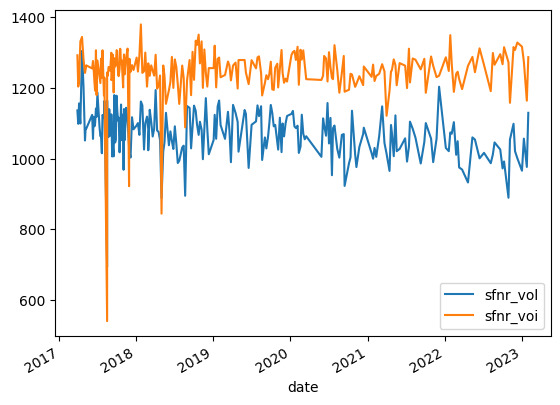

In [27]:
qa.plot(x='date', y=['sfnr_vol', 'sfnr_voi'])

<AxesSubplot: xlabel='date'>

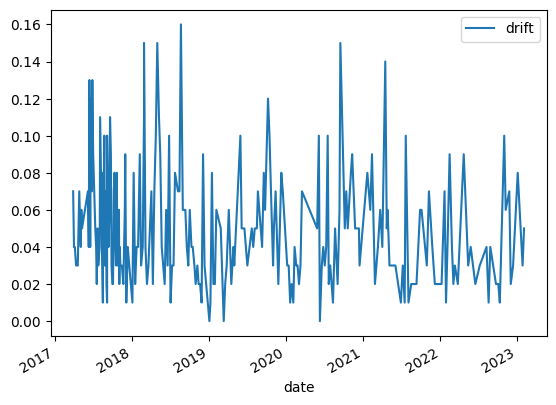

In [28]:
qa.plot(x='date', y=['drift'])

<AxesSubplot: xlabel='date'>

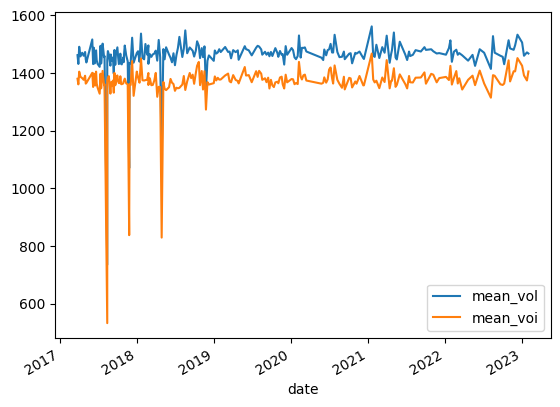

In [29]:
qa.plot(x='date', y=['mean_vol', 'mean_voi'])